In [1]:
import numpy as np

In [2]:
from fair_eval import *
from load_data import *

# Training Logistic Regression (LR)

In [3]:
from sklearn import linear_model as lm
import matplotlib.pyplot as plt

In [4]:
def calculate_fairness_metrics(pred,y_te,z_te):
    #calculate fairness metrics
    acc = calculate_overall_accuracy(pred,y_te,True)
    di = diff_calculate_impact(pred,y_te,z_te)
    omr = diff_calculate_misclassification(pred,y_te,z_te)
    fpr = diff_calculate_mistreatment(pred,y_te,z_te,cond=-1)
    fnr = diff_calculate_mistreatment(pred,y_te,z_te,cond=1)
    
    #print results
    print("accuracy (Acc): ",acc)
    print("disparate impact (DI): ",di)
    print("overall misclassification rate (OMR): ",omr)
    print("false positive rate (FPR): ",fpr)
    print("false negative rate (FNR): ",fnr)

In [5]:
X_tr, X_te, y_tr, y_te, xs_tr, xs_te = load_adult_data(svm=True,random_state=42,intercept=False)

In [6]:
from save_utils import *

In [7]:
print(X_tr)
print(X_tr.shape)
print(X_te.shape)

[[0.         0.         0.53333333 ... 0.         0.         0.        ]
 [1.         0.         0.46666667 ... 0.         0.         0.        ]
 [0.         0.         0.53333333 ... 0.         0.         0.        ]
 ...
 [0.         0.51216713 0.26666667 ... 0.         0.         0.        ]
 [0.         0.         0.8        ... 1.         0.         0.        ]
 [0.         0.         0.53333333 ... 0.         0.         0.        ]]
(34189, 54)
(14653, 54)


In [8]:
print(X_tr.shape)
print(X_tr)

(34189, 54)
[[0.         0.         0.53333333 ... 0.         0.         0.        ]
 [1.         0.         0.46666667 ... 0.         0.         0.        ]
 [0.         0.         0.53333333 ... 0.         0.         0.        ]
 ...
 [0.         0.51216713 0.26666667 ... 0.         0.         0.        ]
 [0.         0.         0.8        ... 1.         0.         0.        ]
 [0.         0.         0.53333333 ... 0.         0.         0.        ]]


In [9]:
print(X_tr.shape)

(34189, 54)


In [10]:
clf = lm.LogisticRegression()
clf.fit(X_tr,y_tr)

/home/srp/.pyenv/versions/pytorch15/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [11]:
pred = clf.predict(X_te)

In [12]:
print(pred)

[-1 -1  1 ... -1 -1 -1]


In [13]:
calculate_fairness_metrics(pred,y_te.flatten(),xs_te.flatten())

accuracy (Acc):  100.0
disparate impact (DI):  19.11020015228512
overall misclassification rate (OMR):  0.0
false positive rate (FPR):  0.0
false negative rate (FNR):  0.0


In [14]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [15]:
pca = PCA(n_components=3)

In [16]:
xtr2 = pca.fit_transform(X_tr)
xte2 = pca.transform(X_te)

In [17]:
y_tr.shape

(34189, 1)

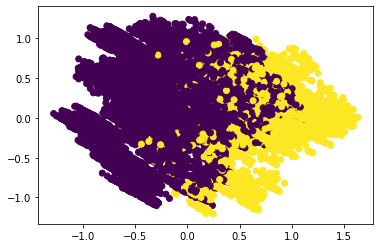

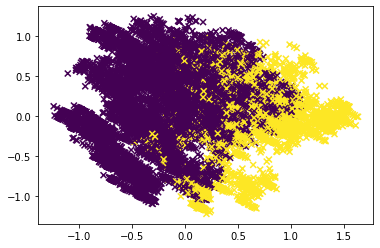

In [18]:
plt.scatter(xtr2[:,0],xtr2[:,1],c=y_tr,marker='o')
plt.show()
plt.scatter(xte2[:,0],xte2[:,1],c=y_te,marker='x')
plt.show()

## principal model parameters

In [68]:
import os
import pickle

In [69]:
coef = clf.coef_

In [70]:
coef.shape

(1, 50)

In [71]:
def save_lr(clf, save_dir = '', filename = 'lr_model'):
    res = {}
    res['coef'] = clf.coef_
    res['intercept'] = clf.intercept_
    save_path = os.path.join(save_dir, filename+'.sm')
    with open(save_path,'wb') as f:
        pickle.dump(res,f)

def load_lr(save_path):
    with open(save_path,'rb') as f:
        aa = pickle.load(f)
    return aa

In [72]:
save_lr(clf)

In [73]:
sm = load_lr('lr_model.sm')

In [74]:
sm

{'coef': array([[-6.31540424e-01,  1.44293901e+00,  1.59821291e+00,
         -3.94117178e-01, -9.90759179e-01, -6.94131560e-01,
         -6.76606325e-01,  1.82782479e+01, -3.13413906e-01,
         -1.52160827e-01,  1.96992202e-01,  6.14500911e-01,
         -3.36419099e-01,  3.42350888e-01,  9.07930269e-01,
         -1.56697118e-01, -7.34706590e-01, -7.14379474e-01,
          1.95995001e+00,  2.58264668e+00,  5.59214846e-02,
          1.32185938e-01,  1.62865109e-01,  7.89576289e-01,
         -8.72116563e-01, -5.94160878e-01, -2.11721390e-01,
         -8.78463572e-01, -9.44528620e-01,  5.77150736e-01,
          5.56604081e-01,  3.53820430e-01,  6.07938431e-01,
         -8.10742204e-02,  5.24869697e-01, -5.08622433e-02,
          1.03910142e-01,  2.47268500e-01, -4.58003497e-01,
         -2.75386606e-01, -4.37798737e-01,  1.54977062e-01,
          3.70728433e-01, -8.22717487e-01, -6.29695503e-01,
         -3.59610364e-03,  5.84300853e-01,  2.87035533e+00,
          2.28730776e+00,  1.786

# testing LR model

## Prediction phase

In [75]:
# scikit-learn svm library
pred_ = clf.predict(X_te)

In [76]:
def predict_lr(X_te, coef, intercept):
    dec_eval = np.dot(X_te,coef.T)+intercept
    return np.sign(dec_eval).flatten()

In [77]:
pred = predict_lr(X_te, sm['coef'],sm['intercept'])

In [78]:
sum(pred ==pred_)

13567

In [79]:
pred

array([-1., -1., -1., ..., -1.,  1., -1.])

In [80]:
pred_

array([-1., -1., -1., ..., -1.,  1., -1.])

# Evaluation

In [30]:
from fair_eval import calculate_prule_clf, calculate_odds_clf, calculate_parity_reg, calculate_group_loss,l2_loss, calculate_overall_accuracy

In [31]:
calculate_prule_clf(pred,y_te,xs_te)

disparate impact:  28.12225084892608
disparate misclassification rate:  39.576491418826556
disparate false positive rate: 18.07199394545052
disparate false negative rate: 76.91751608472492


In [32]:
calculate_odds_clf(pred,y_te,xs_te)

equalized opportunity for -1.0 : 18.07199394545052
equalized opportunity for 1.0 : 80.13315082130413


In [33]:
calculate_parity_reg(pred,y_te,xs_te)

disparate parity for threshold -0.5037959755288568: 28.12225084892608


In [34]:
calculate_group_loss(l2_loss,pred,y_te,xs_te)

loss function:  l2_loss
loss value for group 0: 0.30259829845941594
loss value for group 1: 0.7645910175743111


In [35]:
def cal_overall_accuracy(pred,y):
    pred = pred.flatten()
    return np.sum(pred==y)/len(pred)

In [37]:
calculate_overall_accuracy(pred,y_te)

0.8458760227021449